# Introduction to Natural Language Processing and Text Mining

Welcome to this workshop! In this session, we will cover the basics of Natural Language Processing (NLP) and text mining. We'll explore some essential techniques such as tokenization, part-of-speech tagging, sentiment analysis, and more.

We'll also learn how to download tweets, create word clouds, and pre-process data.

Let's get started!

In [2]:
# pip install wordcloud
# pip install langdetect
# pip install emoji
# pip install contractions
# pip install tweepy
# pip install contractions

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# 1: Importing Necessary Libraries

In this cell, we'll import the necessary libraries to handle data processing and text cleaning. These include pandas for data manipulation, NLTK for natural language processing, and contractions for handling contractions in the text.

# Downloading Tweets

Back when Twitter was twitter (bascially 2023), you could use libraries like Tweepy to download tweets for analysis for free using Twitter APIs. However, it is now slightly difficult to do so. But worry not, I have downloaded tweets for you on "Apple's iPhone" and we can still resume BAU (business as usual).

# 2: Reading Data

Here we are reading the 'Tweets.csv' file into a DataFrame. We're using the 'utf-8' encoding to avoid issues with special characters.

The tweets I collected were on Apple's iPhone

In [ ]:
with open('Tweetsv2.csv', encoding='utf-8') as f:
    df = pd.read_csv(f)

In [6]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
df.shape

(27481, 4)

By specifying the encoding as 'utf-8', you're informing the system to interpret the bytes in the file using the UTF-8 encoding, which usually handles special characters well.

Make sure that the CSV file is actually encoded in UTF-8. If you still encounter issues, you may want to open the CSV file in a text editor that allows you to view and change the encoding (such as Notepad++), and make sure it's saved in UTF-8 format.

# 3: Cleaning DataFrame and Handling Missing Values

We'll now check for any missing values and drop any rows with missing values in the 'text', 'selected_text', or 'sentiment' columns.

In [8]:
df = df.dropna(subset=['text','selected_text', 'sentiment'])
df.shape

(27480, 4)

# 5: Text Preprocessing

In the following cells, we preprocess the text data through several steps. We'll apply contractions, tokenize the text, convert it to lowercase, remove punctuation and stop words, apply part-of-speech tagging, and lemmatize the words.

In [9]:
# Defining functions in the beginning

# Define a function to remove special characters from a tokenized text for later use
def remove_special_characters(tokenized_text):
    return [re.sub(r'[^\w\s]', '', word) for word in tokenized_text]

def is_valid_word(word):
    return len(word) > 1 and word.isalpha()

def filter_english_sentences(text):
    english_text = []
    for sentence in text.split('.'):
        try:
            if detect(sentence) == 'en':
                english_text.append(sentence)
        except LangDetectException:
            pass
    return ' '.join(english_text)


# Function to get WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [10]:
rws = df[['text','selected_text', 'sentiment']]
rws['no_contract'] = rws['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

rws.head()

,text,selected_text,sentiment,no_contract
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th..."


In [11]:
# Tokenize the text
rws['tokenized'] = rws['no_contract'].apply(lambda x: word_tokenize(' '.join(x)))

rws.head()

,text,selected_text,sentiment,no_contract,tokenized
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t..."


In [12]:
# Convert to lowercase
rws['lower'] = rws['tokenized'].apply(lambda x: [word.lower() for word in x])

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t..."


In [13]:
# Remove punctuation
punc = string.punctuation
rws['no_punc'] = rws['lower'].apply(lambda x: [word for word in x if word not in punc])

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on..."


In [14]:
# Remove stop words
stop_words = set(stopwords.words('english'))

custom_stopwords = ['https', 'apple', 'iphone']
stop_words.update(custom_stopwords)


rws['stopwords_removed'] = rws['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]","[responded, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[boss, bullying, ...]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]","[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on...","[sons, put, releases, already, bought]"


Customizing stopwords can be a valuable step in natural language processing (NLP) to enhance the meaningful content in a given text analysis. Stopwords are common words that are often removed because they contribute little to the overall meaning, especially in tasks like text mining, topic modeling, and visualization (like word clouds).

However, in some cases, the standard stopword list might remove words that are important for a particular analysis, or it might not remove words that are unimportant in a specific context. Customizing the stopword list can help to fine-tune the analysis to a specific use case.

Here's how you could customize the stopwords for your word cloud, along with an explanation of the logic:

**1.Start with the Standard Stopwords**: Most NLP libraries, like NLTK, provide a standard list of stopwords. You can start with this list.

**2.Add Custom Stopwords**: Depending on the context of your analysis, you might have specific words that are common but uninformative. You can add these to the stopword list.

**3.Remove Necessary Stopwords**: If the standard list removes words that are meaningful in your context, you can remove these from the stopword list.

In [15]:
# Remove special characters
rws['filtered'] = rws['stopwords_removed'].apply(remove_special_characters)

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]","[responded, going]","[responded, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[boss, bullying, ...]","[boss, bullying, ]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]","[interview, leave, alone]","[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on...","[sons, put, releases, already, bought]","[sons, put, releases, already, bought]"


In [16]:
rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]","[responded, going]","[responded, going]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[boss, bullying, ...]","[boss, bullying, ]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]","[interview, leave, alone]","[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on...","[sons, put, releases, already, bought]","[sons, put, releases, already, bought]"


In [17]:
# Apply POS tagging
rws['pos_tags'] = rws['filtered'].apply(nltk.tag.pos_tag)

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered,pos_tags
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]","[responded, going]","[responded, going]","[(responded, VBD), (going, VBG)]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]","[(sooo, JJ), (sad, JJ), (miss, NN), (san, NN),..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[boss, bullying, ...]","[boss, bullying, ]","[(boss, IN), (bullying, VBG), (, NN)]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]","[interview, leave, alone]","[interview, leave, alone]","[(interview, NN), (leave, VBP), (alone, RB)]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on...","[sons, put, releases, already, bought]","[sons, put, releases, already, bought]","[(sons, NNS), (put, VBP), (releases, NNS), (al..."


In [18]:
# Apply WordNet POS tag
rws['wordnet_pos'] = rws['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered,pos_tags,wordnet_pos
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]","[responded, going]","[responded, going]","[(responded, VBD), (going, VBG)]","[(responded, v), (going, v)]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]","[(sooo, JJ), (sad, JJ), (miss, NN), (san, NN),...","[(sooo, a), (sad, a), (miss, n), (san, n), (di..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[boss, bullying, ...]","[boss, bullying, ]","[(boss, IN), (bullying, VBG), (, NN)]","[(boss, n), (bullying, v), (, n)]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]","[interview, leave, alone]","[interview, leave, alone]","[(interview, NN), (leave, VBP), (alone, RB)]","[(interview, n), (leave, v), (alone, r)]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on...","[sons, put, releases, already, bought]","[sons, put, releases, already, bought]","[(sons, NNS), (put, VBP), (releases, NNS), (al...","[(sons, n), (put, v), (releases, n), (already,..."


In [19]:
# Lemmatize words
wnl = WordNetLemmatizer()
rws['lemmatized'] = rws['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

rws.head()

,text,selected_text,sentiment,no_contract,tokenized,lower,no_punc,stopwords_removed,filtered,pos_tags,wordnet_pos,lemmatized
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[I`d, have, responded,, if, I, were, going]","[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]","[i, d, have, responded, if, i, were, going]","[responded, going]","[responded, going]","[(responded, VBD), (going, VBG)]","[(responded, v), (going, v)]","[respond, go]"
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[Sooo, SAD, I, will, miss, you, here, in, San,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]","[(sooo, JJ), (sad, JJ), (miss, NN), (san, NN),...","[(sooo, a), (sad, a), (miss, n), (san, n), (di...","[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ...]","[boss, bullying, ...]","[boss, bullying, ]","[(boss, IN), (bullying, VBG), (, NN)]","[(boss, n), (bullying, v), (, n)]","[bos, bully, ]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview!, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]","[what, interview, leave, me, alone]","[interview, leave, alone]","[interview, leave, alone]","[(interview, NN), (leave, VBP), (alone, RB)]","[(interview, n), (leave, v), (alone, r)]","[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[Sons, of, ****,, why, couldn`t, they, put, th...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...","[sons, of, why, couldn, t, they, put, them, on...","[sons, put, releases, already, bought]","[sons, put, releases, already, bought]","[(sons, NNS), (put, VBP), (releases, NNS), (al...","[(sons, n), (put, v), (releases, n), (already,...","[son, put, release, already, buy]"


### Creating a Word Cloud

A Word Cloud (or Tag Cloud) is a visual representation of text data. It displays a list of words, the importance of each being shown with font size or color. This format is useful for quickly perceiving the most prominent terms in a large collection of text, and it's often used to visualize free-form text like social media posts, survey responses, and more.

In the context of Natural Language Processing (NLP) and text mining, a Word Cloud can provide insights into the frequency or significance of words within a corpus of text.

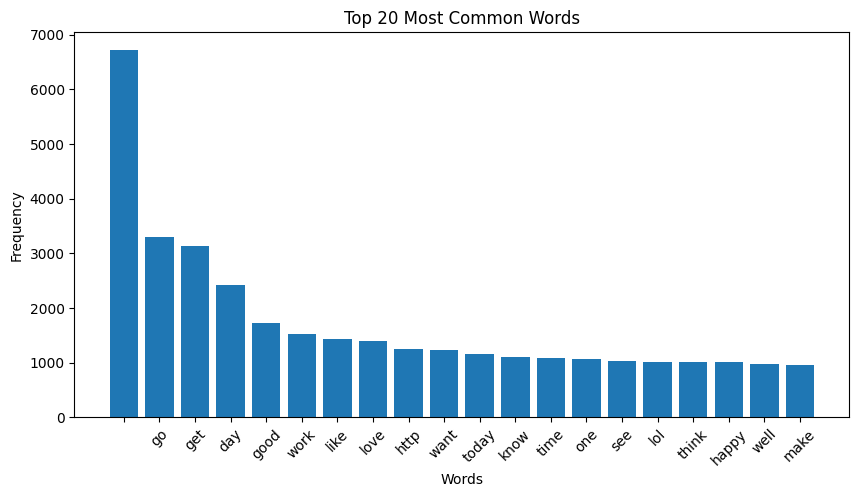

In [20]:
# Combine all the tokenized words into one list
all_words = [word for tokens in rws['lemmatized'] for word in tokens]

# Get the frequency of each word
word_freq = Counter(all_words)

# Select the top 20 most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

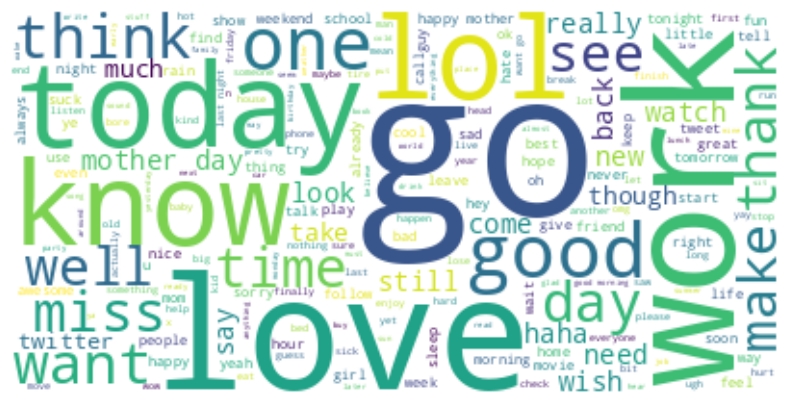

In [21]:
# Combine all the tokenized words into one string
wordcloud_text = ' '.join([' '.join(tokens) for tokens in rws['lemmatized']])

# Creating a word cloud with default font
wordcloud = WordCloud(background_color='white').generate(wordcloud_text)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 6: Saving the Cleaned Data

We'll save the cleaned and preprocessed data to a new CSV file.

In [22]:
rws.to_csv('tweets_clean.csv')